##  Medical Examination Data Analysis

###  Project Overview
In this project, we analyze and visualize data collected during **medical examinations**.  
The dataset contains information about patients, including **body measurements, blood test results, and lifestyle choices**.  

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## **Data Cleaning**

In [5]:
df = pd.read_csv("Dataset/medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
# show information about the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
# Check null values 
df.isnull().sum()

id             0
age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## **Normalize data by making 0 always good and 1 always bad.** 

In [14]:
# Calculate BMI and add 'overweight' column: 1 if BMI > 25, else 0
bmi = df['weight'] / (df['height']/100)**2
df['overweight'] = np.where(bmi > 25, 1, 0)

# Normalize 'gluc' and 'cholesterol': 1 if value > 1 (bad), else 0 (good)
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)

In [15]:
def draw_cat_plot():
    # Reshape the data to long format for categorical plot
    df_cat = pd.melt(df, value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'],
                     id_vars=['cardio'])

    # Group and count the occurrences for each category
    df_cat = pd.DataFrame(
        df_cat.groupby(["cardio", "variable", "value"])["value"].count()
    ).rename(columns={"value": "total"}).reset_index()

    # Draw the categorical bar plot
    fig = sns.catplot(x="variable", y="total", hue="value", col="cardio", data=df_cat, kind="bar")

    # Save the plot and return the figure
    fig.savefig('catplot.png')
    return fig

def draw_heat_map():
    # Clean the data: filter out incorrect blood pressure and outliers in height/weight
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", linewidth=.5)

    # Save the plot and return the figure
    fig.savefig('heatmap.png')
    return fig

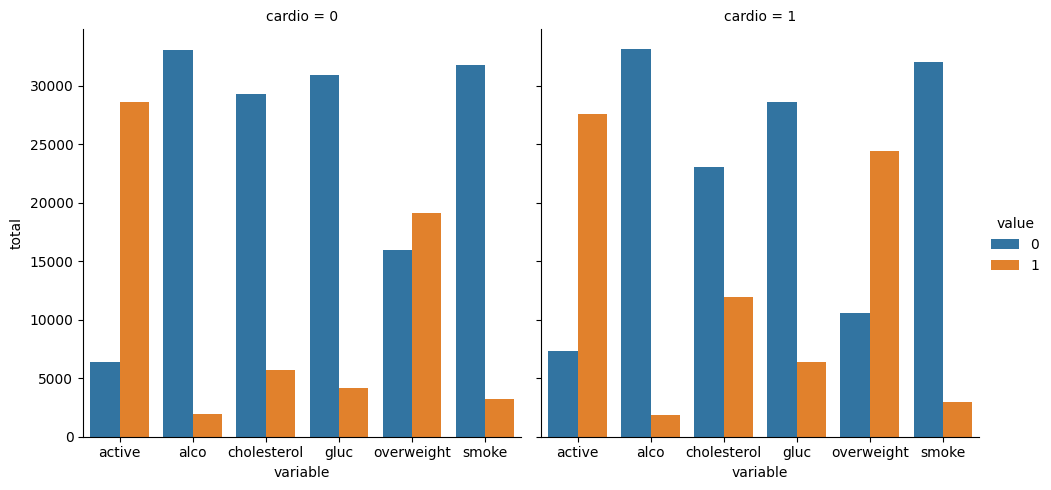

In [16]:
figure_1 = draw_cat_plot()

As show in the figure above, one remarkable insight is that person with good cardio are less likely to be overweight. But however This also applies to other variables, but to a lesser extent, for example, cholesterol and glucose. 

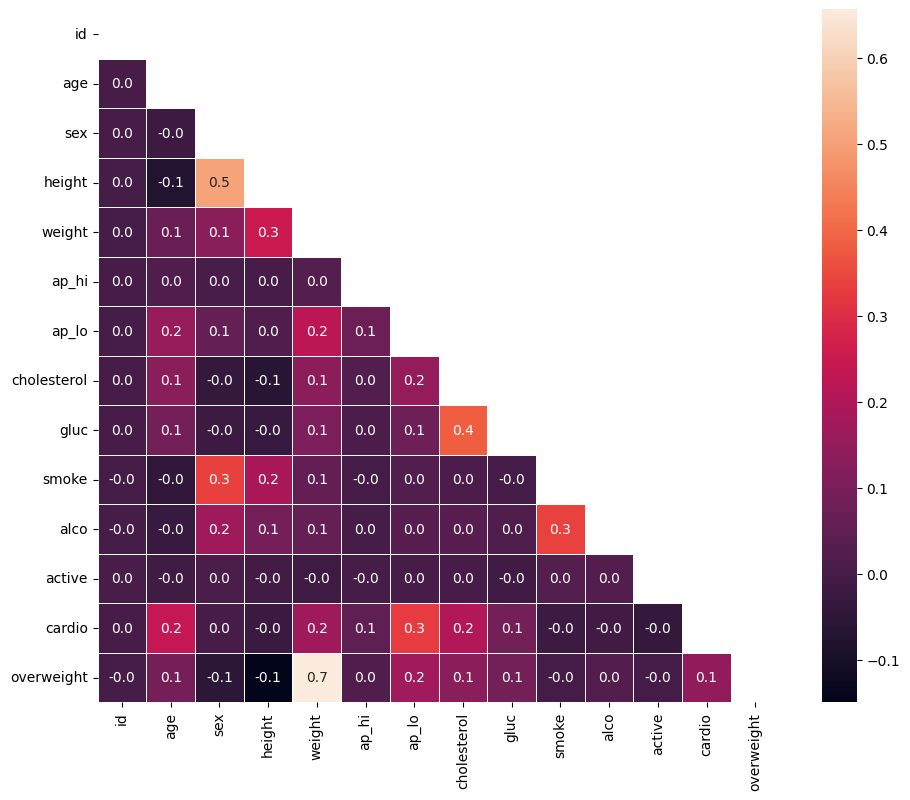

In [17]:
figure_2 = draw_heat_map()

From the graph, we can intuit, that the variables like smoke and alco has closest relationship because these relationship become more significat as the value aproaches to 0.7. The highest ratio is between sex and height, nearly also the relationship between cholesterol and gluc. Of course the weight and overweight has strong relationship.